In [2]:
# Exercise 3.1: Plotting experimental data
from numpy import loadtxt
from pylab import plot, show, xlabel, ylabel, xlim, ylim


Part (a): Basic sunspot plot


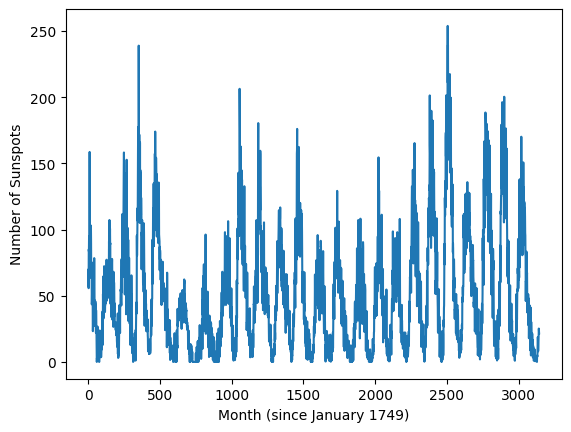

In [3]:
# Part (a): Basic plotting of sunspot data
print("Part (a): Basic sunspot plot")
data = loadtxt("../cpresources/sunspots.txt", float)
months = data[:, 0]
sunspots = data[:, 1]

plot(months, sunspots)
xlabel("Month (since January 1749)")
ylabel("Number of Sunspots")
show()

Part (b): First 1000 data points


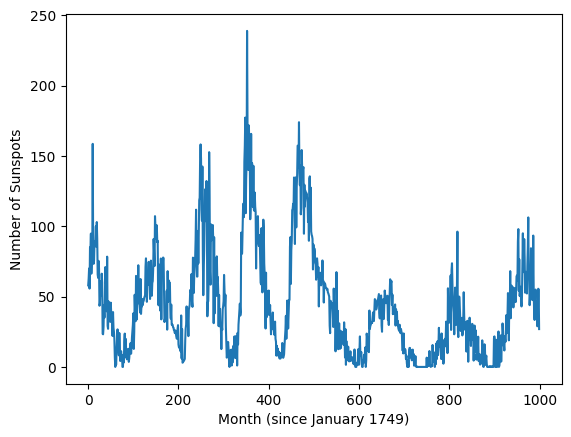

In [4]:
# Part (b): Plot only first 1000 data points
print("Part (b): First 1000 data points")
months_1000 = data[:1000, 0]
sunspots_1000 = data[:1000, 1]

plot(months_1000, sunspots_1000)
xlabel("Month (since January 1749)")
ylabel("Number of Sunspots")
show()


Part (c): Original data with running average


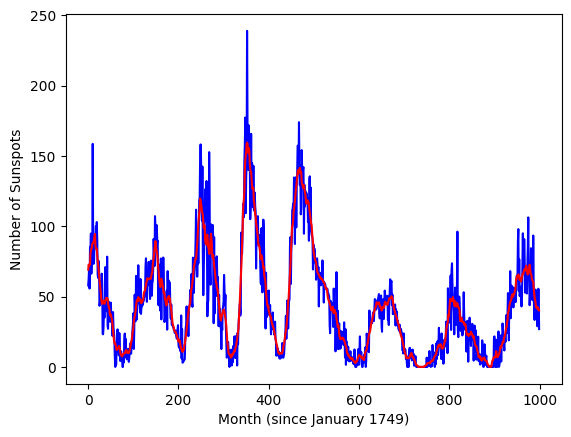

In [5]:
# Part (c): Running average with original data
print("Part (c): Original data with running average")
r = 5  # Running average parameter

# Calculate running average
running_avg = []
for k in range(len(sunspots_1000)):
    # Determine the range for averaging, handling boundaries
    start = max(0, k - r)
    end = min(len(sunspots_1000), k + r + 1)
    
    # Calculate average over the available range
    avg_sum = 0
    count = 0
    for m in range(start, end):
        avg_sum += sunspots_1000[m]
        count += 1
    
    running_avg.append(avg_sum / count)

# Plot both original data and running average
plot(months_1000, sunspots_1000, "b-", label="Original Data")
plot(months_1000, running_avg, "r-", label="Running Average (r=5)")
xlabel("Month (since January 1749)")
ylabel("Number of Sunspots")
show()


Part (c) Alternative: Running average with exact formula


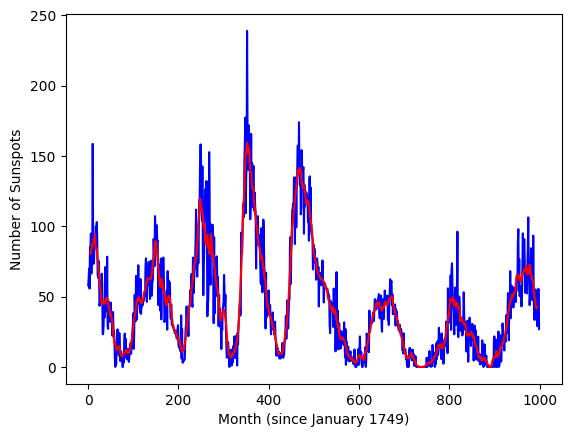

In [6]:
# Alternative implementation for part (c) with exact formula
# This version handles boundaries by only calculating running average 
# where we have enough data points on both sides
print("Part (c) Alternative: Running average with exact formula")
running_avg_exact = []
months_exact = []

for k in range(r, len(sunspots_1000) - r):
    # Calculate Yk = (1/(2r+1)) * sum(y_{k+m}) for m from -r to r
    avg_sum = 0
    for m in range(-r, r + 1):
        avg_sum += sunspots_1000[k + m]
    
    running_avg_exact.append(avg_sum / (2 * r + 1))
    months_exact.append(months_1000[k])

# Plot original data (first 1000 points) and exact running average
plot(months_1000, sunspots_1000, "b-", label="Original Data")
plot(months_exact, running_avg_exact, "r-", label="Running Average (exact)")
xlabel("Month (since January 1749)")
ylabel("Number of Sunspots")
show()